In [37]:
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import imblearn
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import tensorflow_hub as hub
import tensorflow_text as text

In [39]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [40]:
msg = pd.read_csv('train_E6oV3lV.csv')

In [41]:
df_test0=msg[msg["label"]==0]
df_test1=msg[msg["label"]==1]

In [42]:
df_test0=df_test0.iloc[0:500,]
df_test1=df_test1.iloc[0:500,]

In [43]:
msg=msg.drop(df_test0.index)
msg=msg.drop(df_test1.index)

In [44]:
test=pd.concat([df_test0,df_test1])

In [45]:
msg.reset_index(drop=True,inplace=True)

In [46]:
lemmatizer= WordNetLemmatizer()

In [47]:
corpus1=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-z]', ' ',msg['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)

In [48]:
test.reset_index(drop=True,inplace=True)

In [49]:
test

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
995,7146,1,"@user ð´ ""the deafening silence from anti-ra..."
996,7157,1,@user tonight in #cologne. proudly presented ...
997,7168,1,"this! #cambersands deaths blamed on victims' ""..."
998,7173,1,@user more #marxist evil jew #propoganda! why ...


In [50]:
corpus2=[]
for i in range(len(test)):
    review=re.sub('[^a-zA-z]', ' ',test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus2.append(review)

In [51]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
texttransform=sbert_model.encode(corpus1)
testtransform=sbert_model.encode(corpus2)

In [53]:
texttransform,texttransform.shape

(array([[-0.05033198,  0.8826448 ,  1.2239057 , ...,  0.4210539 ,
          0.4105692 ,  0.09700081],
        [ 0.28021646,  0.8486005 ,  1.3231066 , ...,  0.12105219,
         -0.04532439, -0.30801377],
        [ 0.35104585,  0.13897336,  2.109371  , ..., -0.5717936 ,
         -0.15150763, -0.5701781 ],
        ...,
        [-0.30673882,  0.05738524,  0.8658512 , ...,  0.85494846,
          0.3402193 , -0.22528501],
        [ 0.83937943,  1.5611221 ,  0.46583176, ..., -0.60814464,
          0.03173679,  0.01085686],
        [-0.02149194,  0.36523446,  2.6983974 , ...,  0.3282579 ,
         -0.7356926 ,  0.13699558]], dtype=float32), (30962, 768))

In [54]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(texttransform, msg['label'])

In [55]:
X.shape,y.shape

((58440, 768), (58440,))

In [56]:
y.value_counts()

0    29220
1    29220
Name: label, dtype: int64

In [57]:
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 768))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X, y, batch_size = 10, epochs = 10)

Epoch 1/10
5844/5844 [==============================] - 18s 3ms/step - loss: 0.2993 - accuracy: 0.8761
Epoch 2/10
5844/5844 [==============================] - 21s 4ms/step - loss: 0.2461 - accuracy: 0.9016
Epoch 3/10
5844/5844 [==============================] - 14s 2ms/step - loss: 0.2248 - accuracy: 0.9099
Epoch 4/10
5844/5844 [==============================] - 16s 3ms/step - loss: 0.2053 - accuracy: 0.9180
Epoch 5/10
5844/5844 [==============================] - 14s 2ms/step - loss: 0.1885 - accuracy: 0.9251
Epoch 6/10
5844/5844 [==============================] - 14s 2ms/step - loss: 0.1730 - accuracy: 0.9336
Epoch 7/10
5844/5844 [==============================] - 15s 3ms/step - loss: 0.1629 - accuracy: 0.9382
Epoch 8/10
5844/5844 [==============================] - 14s 2ms/step - loss: 0.1527 - accuracy: 0.9424
Epoch 9/10
5844/5844 [==============================] - 14s 2ms/step - loss: 0.1455 - accuracy: 0.9459
Epoch 10/10
5844/5844 [==============================] - 14s 2ms/step - l

In [58]:
y_pred = classifier.predict(testtransform)
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test["label"],y_pred))

32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       500
           1       0.93      0.77      0.84       500

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.85      1000
weighted avg       0.87      0.86      0.85      1000



Text(0.5, 15.0, 'Predicted label')

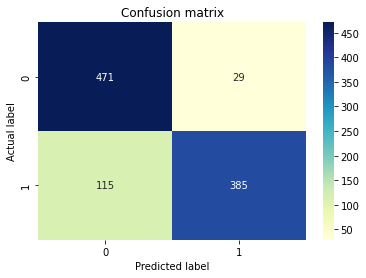

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
sentence='U r bad charactered hateful bigot'
review=re.sub('[^a-zA-z]', ' ',sentence)
review=review.lower()
review=review.split()
review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
review=' '.join(review)
review= [review]
s1=sbert_model.encode(review)
s1

array([[-1.95582733e-02,  3.87708783e-01,  5.96862435e-01,
         1.88484237e-01, -6.80646062e-01,  5.63389778e-01,
         1.76320505e+00,  4.50257123e-01,  3.87949646e-01,
        -1.95864066e-01, -1.01950657e+00,  1.51478052e-01,
        -1.08213611e-02,  6.49362504e-01,  7.61915743e-01,
         6.64016247e-01, -2.98036128e-01, -8.43151450e-01,
        -3.82940114e-01, -3.78985107e-01, -1.25275373e-01,
        -5.50395727e-01,  6.14823759e-01, -6.99521303e-01,
         1.77259907e-01,  2.86527485e-01,  2.98134238e-01,
        -6.64667308e-01, -1.56549084e+00,  2.10749000e-01,
         1.65383473e-01, -3.86435002e-01,  5.00046968e-01,
         4.23112363e-02, -3.96376044e-01,  1.19149303e+00,
         4.37578976e-01, -7.10742950e-01,  2.14009181e-01,
         1.17049448e-01,  1.46508288e+00,  3.62656295e-01,
         2.53582317e-02,  3.67401242e-01, -2.51726154e-02,
        -1.92139521e-01,  8.74193728e-01,  7.72967860e-02,
         6.77564859e-01, -3.44571322e-01, -3.82056832e-0

In [61]:
classifier.predict(s1)


1/1 [==============================] - 0s 18ms/step


array([[0.9214166]], dtype=float32)